In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','notebook'])

# Assignment

A material with a constant polarization $\vec{P}$ that exists absent of a electric field is known as an **electret**. Electrets can be prepared by heating or melting some material, then cooling it in the presence of a strong electric field. The electric field repositions the charge carriers or aligns the dipoles within the material. When the material cools, solidification "freezes" the dipoles in position. These materials are used items such as 

* Microphones
* N95 Masks

In this problem we will consider an electret cube.

## Part 1

A cube, centered at the origin, has sides aligned with the Cartesian $x$, $y$, and $z$ axes, and side length $a$ (so the cube extends for $x \in [-a/2, a/2]$, etc.). This cube has constant polarization density $\vec{P} = P_0 \hat{z}$.

a) Do a direct (numerical) volume integration using the known field of a polarized object <br>
b) Find the bound charges (both volume and surface) and integrate numerically using those

For each, use matplotlib's `contourf` function with 20 levels and `cmap = cm.inferno` and plot in the plane $z=4a/7$ for $x \in [-a, a]$ and $y \in [-a, a]$. (This is the plane directly above the top side of the cube). What method is faster to run on the computer? Why is this the case?

## Part 2 (Bonus)

Consider now a polarized 3x3x3 **electret** rubiks cube with constant polarization density $\vec{P} = P_0 \hat{z}$. It has the same dimensions as the cube in the first part of the problem. Now suppose 

* I take the front of the cube (the positive x side) and rotate it clockwise
* I take the back of the cube (the negative x side) and rotate it in the opposite direction

Plot the potential in the plane $z=4a/7$ for $x \in [-a, a]$ and $y \in [-a, a]$.

*Hints*

* Carefully draw out the cube. Highlight the different regions of the surface and what the polarization is
* I would recommend using the surface method to solve this problem. There will be 6 different regions you need to consider.

## Answer 1

### Volume method.

We will need triple integration.

In [130]:
from scipy.integrate import tplquad

Define the integrand and the potential $(4\pi \epsilon_0 / P_0)V$. Here I am using Griffith's (4.9) 3rd edition.

In [131]:
def integrand(xp_a, yp_a, zp_a, x_a, y_a, z_a):
    return (z_a-zp_a)/((x_a-xp_a)**2+(y_a-yp_a)**2+(z_a-zp_a)**2)**(3/2)
def potential(x_a, y_a, z_a):
    return tplquad(integrand, -1/2, 1/2, lambda x: -1/2, lambda x: 1/2,
                  lambda x, y: -1/2, lambda x, y: 1/2, args=[x_a, y_a, z_a])[0]

Obtain the potential.

In [132]:
x = np.linspace(-1, 1, 25)
y = np.linspace(-1, 1, 25)
xv, yv = np.meshgrid(x, y)

pot = np.vectorize(potential)(xv,yv,4/7)

Plot a color plot.

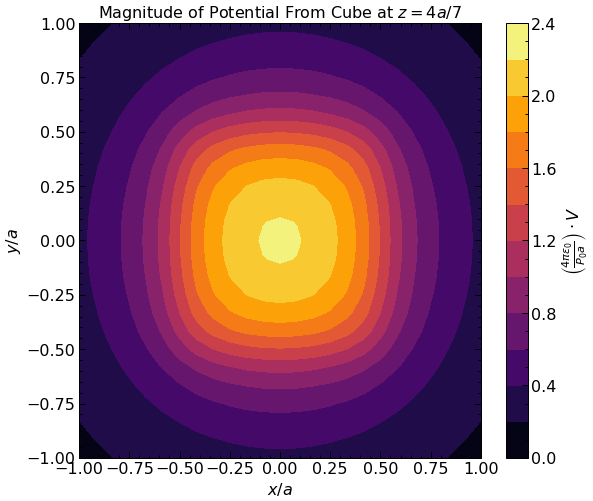

In [133]:
fig, ax = plt.subplots(figsize=(9,8))

cs = ax.contourf(xv, yv, pot, cmap=cmap, levels=20)
cbar = fig.colorbar(cs, ax=ax, extend='both', label=r'$\left(\frac{4 \pi \epsilon_0}{P_0 a}\right) \cdot V$')

ax.set_title('Magnitude of Potential From Cube at $z=4a/7$')
ax.set_xlabel('$x/a$')
ax.set_ylabel('$y/a$')

plt.show()

### Surface method

In [134]:
from scipy.integrate import dblquad

Define the integrand and the potential $(4\pi \epsilon_0 / P_0)V$. Here I am using Griffith's (4.13) 3rd edition.

In [135]:
def integrand(xp_a, yp_a, x_a, y_a, z_a):
    return 1/((x_a-xp_a)**2+(y_a-yp_a)**2+(z_a-1/2)**2)**(1/2) - 1/((x_a-xp_a)**2+(y_a-yp_a)**2+(z_a+1/2)**2)**(1/2) 
def potential(x_a, y_a, z_a):
    return dblquad(integrand, -1/2, 1/2, lambda x: -1/2, lambda x: 1/2,
                   args=[x_a, y_a, z_a])[0]

Obtain values

In [136]:
x = np.linspace(-1, 1, 25)
y = np.linspace(-1, 1, 25)
xv, yv = np.meshgrid(x, y)

pot = np.vectorize(potential)(xv,yv,4/7)

Plot

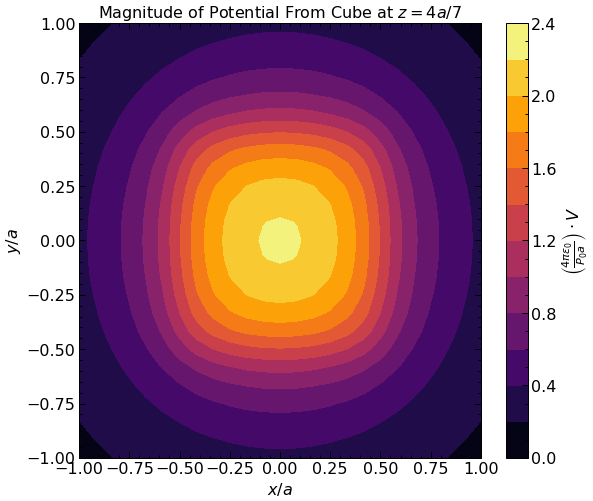

In [137]:
fig, ax = plt.subplots(figsize=(9,8))

cs = ax.contourf(xv, yv, pot, cmap=cmap, levels=12)
cbar = fig.colorbar(cs, ax=ax, extend='both', label=r'$\left(\frac{4 \pi \epsilon_0}{P_0 a}\right) \cdot V$')

ax.set_title('Magnitude of Potential From Cube at $z=4a/7$')
ax.set_xlabel('$x/a$')
ax.set_ylabel('$y/a$')

plt.show()

## Answer 2

Define the integrands of the 6 regions of the cube I need to integrate over along with the potential $(4\pi \epsilon_0 / P_0)V$. Here I am using Griffith's (4.13) 3rd edition.

In [138]:
def integrand_1(xp_a, zp_a, x_a, y_a, z_a):
    return 1/((x_a-xp_a)**2+(y_a-1/2)**2+(z_a-zp_a)**2)**(1/2) 
def integrand_2(xp_a, zp_a, x_a, y_a, z_a):
    return -1/((x_a-xp_a)**2+(y_a-1/2)**2+(z_a-zp_a)**2)**(1/2) 
def integrand_3(xp_a, yp_a, x_a, y_a, z_a):
    return 1/((x_a-xp_a)**2+(y_a-yp_a)**2+(z_a-1/2)**2)**(1/2) 
def integrand_4(xp_a, yp_a, x_a, y_a, z_a):
    return -1/((x_a-xp_a)**2+(y_a-yp_a)**2+(z_a+1/2)**2)**(1/2) 
def integrand_5(xp_a, zp_a, x_a, y_a, z_a):
    return -1/((x_a-xp_a)**2+(y_a+1/2)**2+(z_a-zp_a)**2)**(1/2) 
def integrand_6(xp_a, zp_a, x_a, y_a, z_a):
    return 1/((x_a-xp_a)**2+(y_a+1/2)**2+(z_a-zp_a)**2)**(1/2) 

def potential(x_a, y_a, z_a):
    return dblquad(integrand_1, -1/2, 1/2, lambda x: 1/6, lambda x: 1/2,
                   args=[x_a, y_a, z_a])[0] \
         + dblquad(integrand_2, -1/2, 1/2, lambda x: -1/2, lambda x: -1/6,
                   args=[x_a, y_a, z_a])[0] \
         + dblquad(integrand_3, -1/2, 1/2, lambda x: -1/6, lambda x: 1/6,
                   args=[x_a, y_a, z_a])[0] \
         + dblquad(integrand_4, -1/2, 1/2, lambda x: -1/6, lambda x: 1/6,
                   args=[x_a, y_a, z_a])[0] \
         + dblquad(integrand_5, -1/2, 1/2, lambda x: 1/6, lambda x: 1/2,
                   args=[x_a, y_a, z_a])[0] \
         + dblquad(integrand_6, -1/2, 1/2, lambda x: -1/2, lambda x: -1/6,
                   args=[x_a, y_a, z_a])[0]       

Obtain values

In [139]:
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
xv, yv = np.meshgrid(x, y)

pot = np.vectorize(potential)(xv,yv,4/7)

Plot

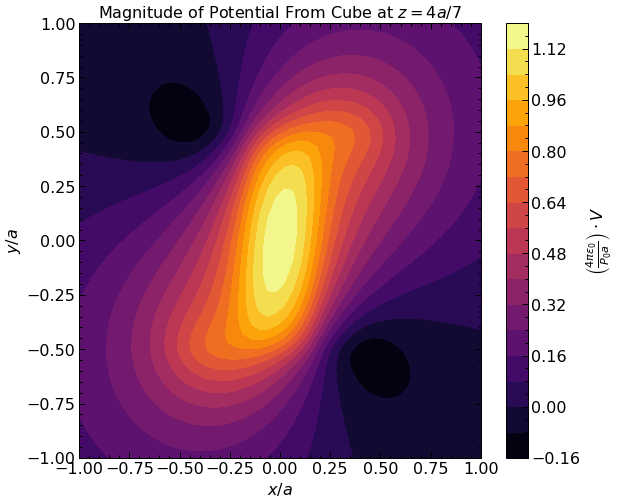

In [140]:
fig, ax = plt.subplots(figsize=(9,8))

cs = ax.contourf(xv, yv, pot, cmap=cmap, levels=20)
cbar = fig.colorbar(cs, ax=ax, extend='both', label=r'$\left(\frac{4 \pi \epsilon_0}{P_0 a}\right) \cdot V$')

ax.set_title('Magnitude of Potential From Cube at $z=4a/7$')
ax.set_xlabel('$x/a$')
ax.set_ylabel('$y/a$')

plt.show()